<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проведем-предобработку-данных" data-toc-modified-id="Проведем-предобработку-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проведем предобработку данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменения-концентрации-металлов-на-различных-этапах" data-toc-modified-id="Изменения-концентрации-металлов-на-различных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменения концентрации металлов на различных этапах</a></span></li><li><span><a href="#Удаление-выбросов" data-toc-modified-id="Удаление-выбросов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Удаление выбросов</a></span></li><li><span><a href="#Распределения-размеров-гранул" data-toc-modified-id="Распределения-размеров-гранул-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Распределения размеров гранул</a></span></li><li><span><a href="#Суммарная-концентрация-металлов" data-toc-modified-id="Суммарная-концентрация-металлов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Суммарная концентрация металлов</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

Загрузим все необходимые для анализа данные

In [3]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv')

In [4]:
data_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


Тренировочный набор данных содержит в себе 87 столбцов, так же можно заметить, что в данном датафрейме содержатся пропуски, все признаки - численные

In [6]:
data_test = pd.read_csv('/datasets/gold_industry_test.csv')

In [7]:
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

Тестовый набор данных содержит в себе 53 столбцов, в данном датафрейме также содержатся пропуски и все признаки - численные

In [9]:
data_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [10]:
data_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [11]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Полный набор данных состоит из 87 колонок и, аналогично, содержит пропуси и только численные признаки

Проверим, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [12]:
c = data_train['rougher.output.concentrate_au'] 
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery_train = (c * (f - t)) / (f * (c - t)) * 100
print(mean_absolute_error(data_train['rougher.output.recovery'], recovery_train))

9.83758577644259e-15


Значение средней абсолютной ошибкой между расчитанной эффективность обогащения и её реальным значением стремится к нулю. Тогда, данная эффективность расчитана верно. 

Проанализируем признаки, недоступные в тестовой выборке

In [13]:
difference = set(data_train.columns) - set(data_test.columns)
print(difference)

{'secondary_cleaner.output.tail_pb', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_au', 'rougher.output.concentrate_sol', 'final.output.tail_ag', 'final.output.tail_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.recovery', 'secondary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_ag', 'primary_cleaner.output.tail_au', 'rougher.output.tail_ag', 'final.output.tail_pb', 'rougher.output.tail_pb', 'final.output.concentrate_pb', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.au_pb_ratio', 'final.output.concentrate_sol', 'rougher.output.concentrate_ag', 'secondary_cleaner.output.tail_sol', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'final.output.tail_au', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'final.output.recovery', 'rougher.output.tail_sol

Можно заметить, что в тестовом датафрейме отсутсвуют доли элементов в черновом и финальном концентратах, содержание золота в концентрате, соотношения золота и свинца. Добавим их к тестовому набору данных целевые признаки

In [14]:
data_target = data_full[['date', 'rougher.output.recovery', 'final.output.recovery']]

In [15]:
data_test = data_test.merge(data_target, how='left', on='date')

In [16]:
difference_final = set(data_train.columns) - set(data_test.columns)

<h3>Проведем предобработку данных</h3>

Посмотрим на количество пропусках в датафреймах

In [17]:
# Посмотрим на долю пропусков в полном датафрейме
pd.DataFrame(round(data_full.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
secondary_cleaner.output.tail_sol,9.000000
rougher.input.floatbank11_xanthate,2.300000
rougher.state.floatbank10_e_air,2.200000
primary_cleaner.output.concentrate_sol,1.900000
secondary_cleaner.state.floatbank2_a_air,1.100000
final.output.concentrate_sol,1.100000
rougher.input.feed_size,0.700000
primary_cleaner.output.concentrate_pb,0.600000
primary_cleaner.input.xanthate,0.500000
final.output.tail_pb,0.500000


Так как доля пропусков в каждом столбце не превышает 10%, удалим пропущенные значения

In [18]:
data_full = data_full.dropna()

In [19]:
# Аналогичным образом, поступим с обучающим и тестовым наборами данных
pd.DataFrame(round(data_train.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
secondary_cleaner.output.tail_sol,6.300000
rougher.state.floatbank10_e_air,2.900000
rougher.input.floatbank11_xanthate,2.800000
primary_cleaner.output.concentrate_sol,1.800000
final.output.concentrate_sol,1.300000
rougher.input.feed_size,0.700000
secondary_cleaner.state.floatbank2_a_air,0.600000
primary_cleaner.output.concentrate_pb,0.600000
rougher.input.feed_sol,0.500000
final.output.tail_pb,0.500000


In [20]:
data_train = data_train.dropna()

In [21]:
pd.DataFrame(round(data_test.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
secondary_cleaner.state.floatbank2_a_air,2.600000
rougher.input.floatbank11_xanthate,0.900000
rougher.input.feed_size,0.900000
primary_cleaner.input.xanthate,0.900000
rougher.input.feed_pb,0.600000
rougher.input.feed_sol,0.500000
primary_cleaner.input.depressant,0.200000
rougher.input.floatbank11_sulfate,0.200000
rougher.state.floatbank10_e_air,0.100000
rougher.input.feed_rate,0.100000


In [22]:
data_test = data_test.dropna()

Обновим индексы в датасетах

In [23]:
data_full = data_full.reset_index(drop=True)
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

Проверим датафреймы на явные дубликаты

In [24]:
data_full.duplicated().sum()

0

In [25]:
data_train.duplicated().sum()

0

In [26]:
data_test.duplicated().sum()

0

Явные дубликаты отсутсвуют. Можно приступить к анализу данных

## Анализ данных

<h3>Изменения концентрации металлов на различных этапах</h3>

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

Для золота

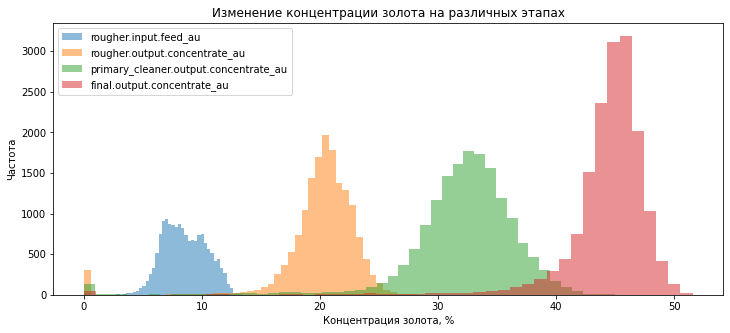

In [27]:
cols = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
for col in cols:
    data_full[col].plot(kind='hist', bins=50, alpha=0.5, figsize=(12,5))
plt.title('Изменение концентрации золота на различных этапах')
plt.xlabel('Концентрация золота, %')
plt.ylabel('Частота')
plt.legend()
plt.show()

**Вывод:** можно заметить, что для каждого признака образуются выбросы (значения, близкие к нулю). Концентрация золота на этапе исходного сырья варьируется в основном от 7 до 11, после флотации - от 18 до 23, после первичной отчистки - от 30 до 35, а финальный концентрат - от 44 до 46. Таким образом, концентрация золота возрастает. 

Для серебра

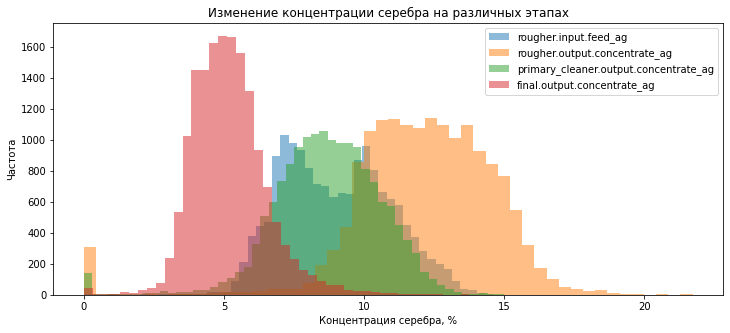

In [28]:
cols = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
for col in cols:
    data_full[col].plot(kind='hist', bins=50, alpha=0.5, figsize=(12,5))
plt.title('Изменение концентрации серебра на различных этапах')
plt.xlabel('Концентрация серебра, %')
plt.ylabel('Частота')
plt.legend()
plt.show()

**Вывод:**  для каждого признака образуются выбросы (значения, близкие к нулю), аналогично концентрату золота. Концентрация серебра на этапе исходного сырья варьируется в основном от 7 до 11, после флотации - от 10 до 15, после первичной отчистки - от 6 до 11, а финальный концентрат - от 3 до 6. Конуентрация серебра, в свою очередь, начинает снижаться. 

Для свинца

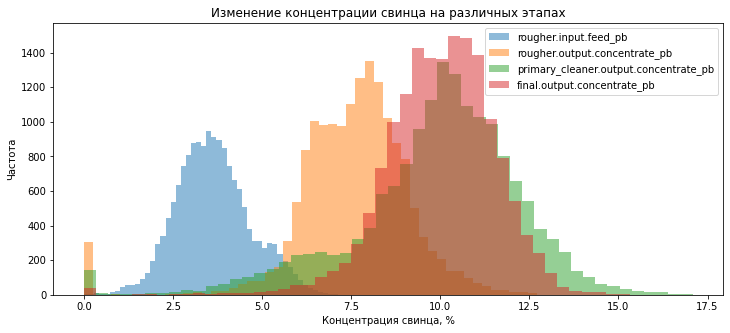

In [29]:
cols = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
for col in cols:
    data_full[col].plot(kind='hist', bins=50, alpha=0.5, figsize=(12,5))
plt.title('Изменение концентрации свинца на различных этапах')
plt.xlabel('Концентрация свинца, %')
plt.ylabel('Частота')
plt.legend()
plt.show()

**Вывод:** для каждого признака образуются выбросы (значения, близкие к нулю). Концентрация свинца на этапе исходного сырья варьируется в основном от 2.5 до 4.5, после флотации - от 7 до 9, после первичной отчистки - от 9 до 11, а финальный концентрат - от 9 до 11. Конуентрация свинца увеличивается.

<h3>Удаление выбросов</h3>

Посмотрим на выбросы для концентрации золота

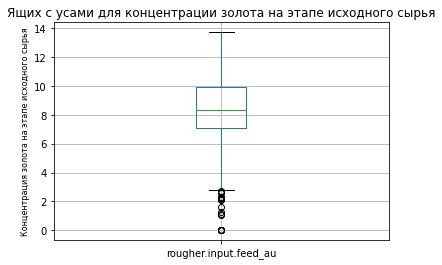

In [30]:
data_full.boxplot(column=['rougher.input.feed_au'])
plt.title('Ящих с усами для концентрации золота на этапе исходного сырья')
plt.ylabel('Концентрация золота на этапе исходного сырья', fontsize=8)
plt.show();

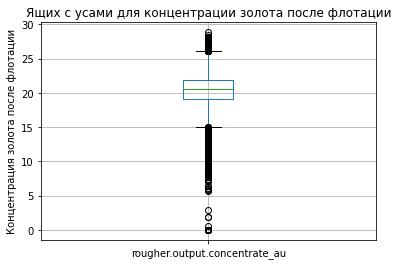

In [31]:
data_full.boxplot(column=['rougher.output.concentrate_au'])
plt.title('Ящих с усами для концентрации золота после флотации')
plt.ylabel('Концентрация золота после флотации')
plt.show()

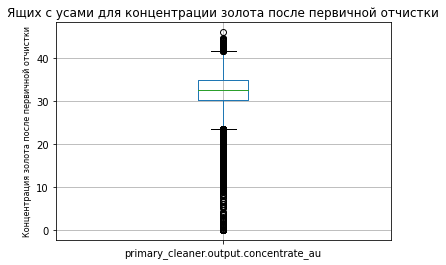

In [32]:
data_full.boxplot(column=['primary_cleaner.output.concentrate_au'])
plt.title('Ящих с усами для концентрации золота после первичной отчистки')
plt.ylabel('Концентрация золота после первичной отчистки', fontsize=8)
plt.show()

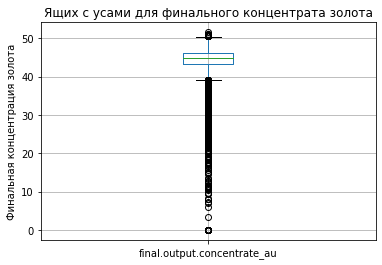

In [33]:
data_full.boxplot(column=['final.output.concentrate_au'])
plt.title('Ящих с усами для финального концентрата золота')
plt.ylabel('Финальная концентрация золота')
plt.show()

In [34]:
data_full = data_full[data_full['rougher.input.feed_au'] >= 1.5]
data_train = data_train[data_train['rougher.input.feed_au'] >= 1.5]
data_full = data_full[(data_full['rougher.output.concentrate_au'] > 1.5)]
data_train = data_train[(data_train['rougher.output.concentrate_au'] > 1.5)]
data_full = data_full[(data_full['primary_cleaner.output.concentrate_au'] > 1.5)]
data_train = data_train[(data_train['primary_cleaner.output.concentrate_au'] > 1.5)]
data_full = data_full[(data_full['final.output.concentrate_au'] > 1.5)]
data_train = data_train[(data_train['final.output.concentrate_au'] > 1.5)]

Посмотрим на выбросы для концентрации серебра

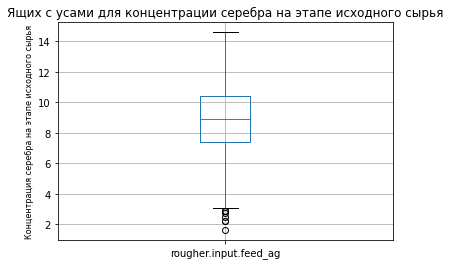

In [35]:
data_train.boxplot(column=['rougher.input.feed_ag'])
plt.title('Ящих с усами для концентрации серебра на этапе исходного сырья')
plt.ylabel('Концентрация серебра на этапе исходного сырья', fontsize=8)
plt.show();

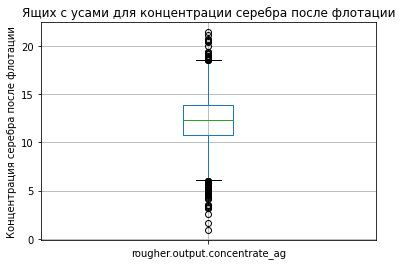

In [36]:
data_train.boxplot(column=['rougher.output.concentrate_ag'])
plt.title('Ящих с усами для концентрации серебра после флотации')
plt.ylabel('Концентрация серебра после флотации')
plt.show()

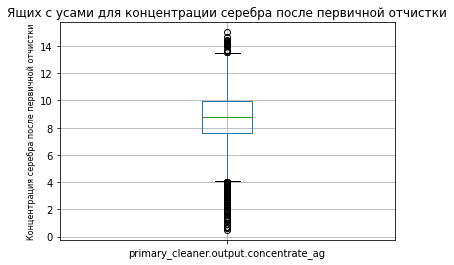

In [37]:
data_train.boxplot(column=['primary_cleaner.output.concentrate_ag'])
plt.title('Ящих с усами для концентрации серебра после первичной отчистки')
plt.ylabel('Концентрация серебра после первичной отчистки', fontsize=8)
plt.show()

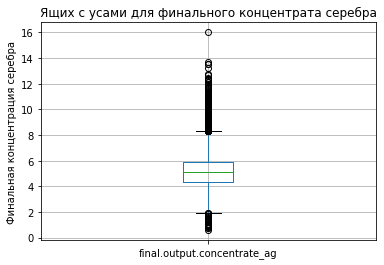

In [38]:
data_train.boxplot(column=['final.output.concentrate_ag'])
plt.title('Ящих с усами для финального концентрата серебра')
plt.ylabel('Финальная концентрация серебра')
plt.show()

In [39]:
# Удалим выбросы из полного и тренировочного наборов данных
data_full = data_full[data_full['rougher.input.feed_ag'] >= 1.5]
data_train = data_train[data_train['rougher.input.feed_ag'] >= 1.5]
data_full = data_full[(data_full['rougher.output.concentrate_ag'] > 1.5)]
data_train = data_train[(data_train['rougher.output.concentrate_ag'] > 1.5)]
data_full = data_full[(data_full['primary_cleaner.output.concentrate_ag'] > 1.5)]
data_train = data_train[(data_train['primary_cleaner.output.concentrate_ag'] > 1.5)]
data_full = data_full[(data_full['final.output.concentrate_ag'] > 1.5)]
data_train = data_train[(data_train['final.output.concentrate_ag'] > 1.5)]

Посмотрим на выбросы для концентрации свинца

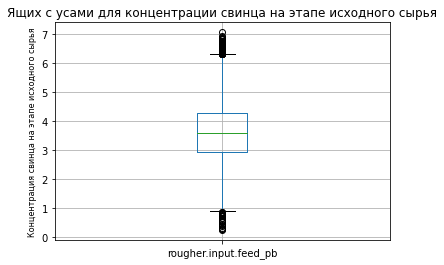

In [40]:
data_train.boxplot(column=['rougher.input.feed_pb'])
plt.title('Ящих с усами для концентрации свинца на этапе исходного сырья')
plt.ylabel('Концентрация свинца на этапе исходного сырья', fontsize=8)
plt.show();

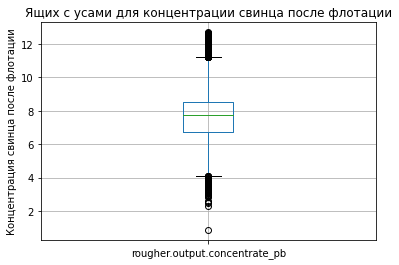

In [41]:
data_train.boxplot(column=['rougher.output.concentrate_pb'])
plt.title('Ящих с усами для концентрации свинца после флотации')
plt.ylabel('Концентрация свинца после флотации')
plt.show()

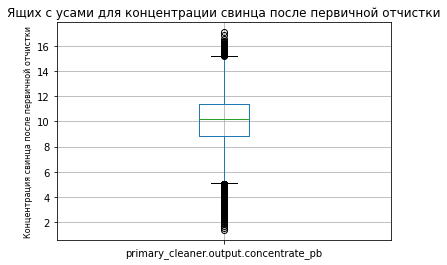

In [42]:
data_train.boxplot(column=['primary_cleaner.output.concentrate_pb'])
plt.title('Ящих с усами для концентрации свинца после первичной отчистки')
plt.ylabel('Концентрация свинца после первичной отчистки', fontsize=8)
plt.show()

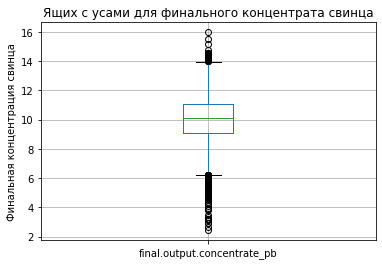

In [43]:
data_train.boxplot(column=['final.output.concentrate_pb'])
plt.title('Ящих с усами для финального концентрата свинца')
plt.ylabel('Финальная концентрация свинца')
plt.show()

In [44]:
# Удалим выбросы из полного и тренировочного наборов данных
data_full = data_full[data_full['rougher.input.feed_pb'] >= 1.5]
data_train = data_train[data_train['rougher.input.feed_pb'] >= 1.5]
data_full = data_full[(data_full['rougher.output.concentrate_pb'] > 1.5)]
data_train = data_train[(data_train['rougher.output.concentrate_pb'] > 1.5)]
data_full = data_full[(data_full['primary_cleaner.output.concentrate_pb'] > 1.5)]
data_train = data_train[(data_train['primary_cleaner.output.concentrate_pb'] > 1.5)]
data_full = data_full[(data_full['final.output.concentrate_pb'] > 1.5)]
data_train = data_train[(data_train['final.output.concentrate_pb'] > 1.5)]

<h3>Распределения размеров гранул</h3>

Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках. 

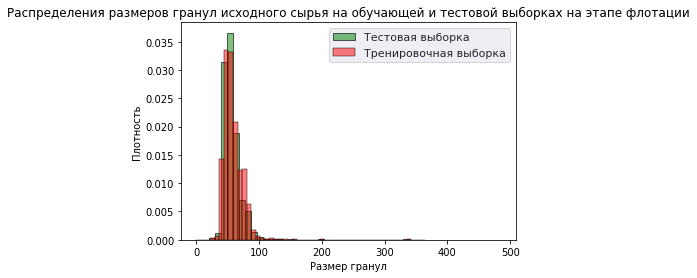

In [45]:
sns.histplot(data=data_train['rougher.input.feed_size'], stat='density', bins=50, alpha=0.5, color='green')
sns.histplot(data=data_test['rougher.input.feed_size'], stat='density', bins=50, alpha=0.5, color='red')
sns.set(rc={"figure.figsize":(8, 5)})
plt.legend(labels=['Тестовая выборка', 'Тренировочная выборка'])
plt.title('Распределения размеров гранул исходного сырья на обучающей и тестовой выборках на этапе флотации')
plt.ylabel('Плотность');
plt.xlabel('Размер гранул');

<h3>Суммарная концентрация металлов</h3>

Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

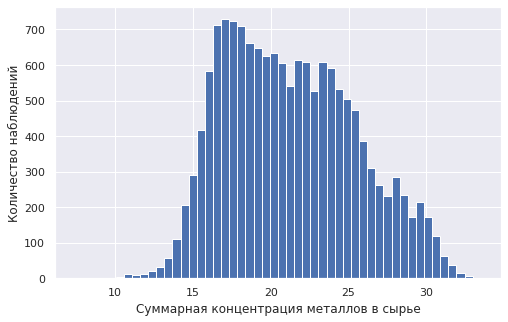

In [46]:
#В сырье
(data_full['rougher.input.feed_au'] + data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb']).hist(bins=50)
plt.xlabel('Суммарная концентрация металлов в сырье')
plt.ylabel('Количество наблюдений')
plt.show();

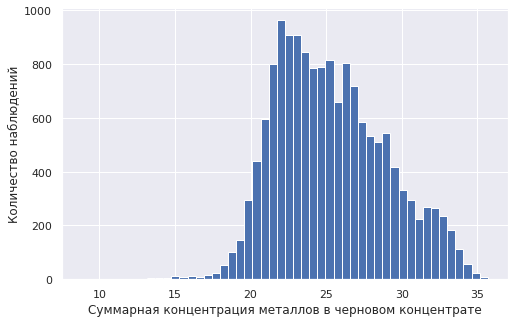

In [47]:
# В черновом концентрате
(data_full['rougher.input.feed_au'] + data_full['rougher.input.feed_ag'] + data_full['rougher.output.concentrate_pb']).hist(bins=50)
plt.xlabel('Суммарная концентрация металлов в черновом концентрате')
plt.ylabel('Количество наблюдений')
plt.show()

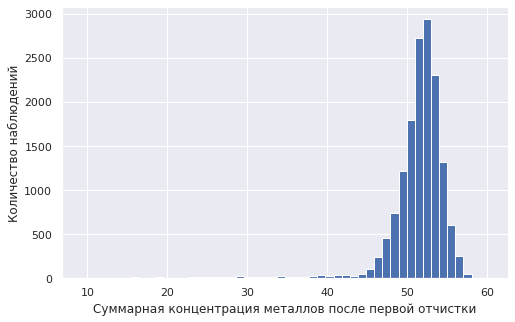

In [48]:
# В концентрате после первой очистки
(data_full['primary_cleaner.output.concentrate_au'] + data_full['primary_cleaner.output.concentrate_ag'] + data_full['primary_cleaner.output.concentrate_pb']).hist(bins=50)
plt.xlabel('Суммарная концентрация металлов после первой отчистки')
plt.ylabel('Количество наблюдений')
plt.show()

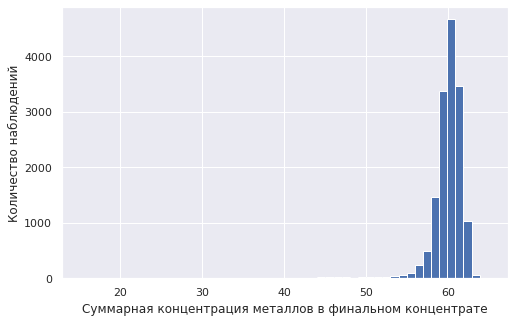

In [49]:
# В финальном концентрате
(data_full['final.output.concentrate_au'] + data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb']).hist(bins=50)
plt.xlabel('Суммарная концентрация металлов в финальном концентрате')
plt.ylabel('Количество наблюдений')
plt.show()

**Вывод:** суммарная концентрация веществ достигает: в сырье - 16-26, в черновом концентрате - 21-29, в концентрате после первой очистки - 51-53, в финальном концентрате - 59-61.5
Можно заметить, что финальная концентрация больше исходной в 2.3-3.6 раз. 

## Модель

Напишем функцию для вычисления sMAPE

In [50]:
def smape(true_values, predicted_values):
    res = abs(true_values - predicted_values) / ((abs(true_values) + abs(predicted_values)) / 2) * 100
    #res = res.fillna(value=0)
    res = sum(res) / len(res)
    return res

In [51]:
def smape_scorer(estimator, X, y):
    return smape(estimator.predict(X), y)

In [52]:
#Вычислим итоговое sMAPE
def smape_final(rougher, final):
    return 0.25 * rougher + 0.75 * final

Подготовим данные для построения модели

In [53]:
# Удалим столбец с датой, так как он не нужен для построения моделей
data_train = data_train.drop(columns=['date'])
data_test = data_test.drop(columns=['date'])

In [54]:
# Удалим из тренировочной выборке те признаки, которых нет в тестовой
data_train = data_train.drop(columns=difference_final)

In [55]:
#Обновим индексы в наборах данных
data_full = data_full.reset_index(drop=True)
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [56]:
# Определим target и features
features_train_rougher = data_train.filter(regex='^rougher',axis=1)
features_train_rougher = features_train_rougher.drop(columns=['rougher.output.recovery'])
features_train_final = data_train.drop(columns=['rougher.output.recovery', 'final.output.recovery'])
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

In [57]:
state = np.random.RandomState(12345)

In [58]:
# Произведем масштабирование признаков
scaler_r = StandardScaler()
scaler_r.fit(features_train_rougher) 
features_train_rougher = scaler_r.transform(features_train_rougher)

In [59]:
scaler_f = StandardScaler()
scaler_f.fit(features_train_final) 
features_train_final = scaler_f.transform(features_train_final)

Построим модель линейной регрессии

In [60]:
model_linear = LinearRegression()
scores_rougher = cross_val_score(model_linear, features_train_rougher, target_train_rougher, scoring=smape_scorer)
rougher_score = np.array(scores_rougher).mean()
scores_final = cross_val_score(model_linear, features_train_final, target_train_final, scoring=smape_scorer)
final_score = np.array(scores_final).mean()
print('Метрика sMAPE:', abs(smape_final(rougher_score, final_score)))

Метрика sMAPE: 8.345377621566465


Построим модель дерева принятия решений

In [61]:
best_model_tree = None
best_smape_tree = 10000
best_depth_tree = 0
for depth in range(1, 16):
    model = DecisionTreeRegressor(random_state=state, max_depth=depth)
    scores_rougher = cross_val_score(model, features_train_rougher, target_train_rougher, scoring=smape_scorer)
    scores_final = cross_val_score(model, features_train_final, target_train_final, scoring=smape_scorer)
    score_rougher = np.array(scores_rougher).mean()
    score_final = np.array(scores_final).mean()
    score = abs(smape_final(score_rougher, score_final))
    if score < best_smape_tree:
        best_model_tree = model
        best_smape_tree = score
        best_depth_tree = depth

In [62]:
print('Метрика sMAPE:', best_smape_tree)
print('Лучшая глубина дерева', best_depth_tree)

Метрика sMAPE: 7.604047815015989
Лучшая глубина дерева 2


Построим модель случйного леса

In [63]:
best_model_forest = None
best_est_forest = 0
best_depth_forest = 0 
best_res_forest = 10000
for depth in range(1, 6):
    for est in range(1, 41, 10):
        model = RandomForestRegressor(random_state=state, n_estimators=est, max_depth=depth)
        score_rougher = cross_val_score(model, features_train_rougher, target_train_rougher, scoring=smape_scorer)
        score_rougher = np.array(score_rougher).mean()
        score_final = cross_val_score(model, features_train_final, target_train_final, scoring=smape_scorer)
        score_final = np.array(score_final).mean()
        score = abs(smape_final(score_rougher, score_final))
        if score < best_res_forest:
            best_model_forest = model
            best_est_forest = est
            best_depth_forest = depth
            best_res_forest = score

In [64]:
print('Лучшая глубина леса:', best_est_forest)
print('Лучшая глубина дерева в лесу:', best_depth_forest)
print('Лучшая метрика sMAPE:', best_res_forest)

Лучшая глубина леса: 11
Лучшая глубина дерева в лесу: 2
Лучшая метрика sMAPE: 7.399283546741981


Таким образом, получили, что лучшая модель - модель случайного леса принятия решения (с глубиной дерева - 2, глубиной леса -11). Проверим данную модель на тестовой выборке.

In [65]:
features_test_rougher = data_test.filter(regex='^rougher',axis=1)
features_test_rougher = features_test_rougher.drop(columns=['rougher.output.recovery'])
features_test_final = data_test.drop(columns=['rougher.output.recovery', 'final.output.recovery'])
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

In [66]:
# Произведем масштабирование признаков для тестовой выборки
features_test_rougher = scaler_r.transform(features_test_rougher)

In [67]:
features_test_final = scaler_f.transform(features_test_final)

In [68]:
model_rougher = RandomForestRegressor(random_state=state, n_estimators=11, max_depth=2)
model_final = RandomForestRegressor(random_state=state, n_estimators=11, max_depth=2)

model_rougher.fit(features_train_rougher, target_train_rougher)
model_final.fit(features_train_final, target_train_final)

test_predictions_rougher = model_rougher.predict(features_test_rougher)
test_predictions_final = model_final.predict(features_test_final)

smape_rougher = smape(target_test_rougher, test_predictions_rougher)
final_smape = smape(target_test_final, test_predictions_final)
print('Итоговое значение метрики sMAPE:', smape_final(smape_rougher, final_smape))

Итоговое значение метрики sMAPE: 7.343746922423792


Проверим модель на адекватность

In [69]:
dummy_rougher = DummyRegressor(strategy="mean")
dummy_final = DummyRegressor(strategy="mean")

dummy_rougher.fit(features_train_rougher, target_train_rougher)
dummy_final.fit(features_train_final, target_train_final)

dummy_predicted_rougher = dummy_rougher.predict(features_train_rougher)
dummy_predicted_final = dummy_final.predict(features_train_final)

smape_r = smape(target_train_rougher, dummy_predicted_rougher)
smape_f = smape(target_train_final, dummy_predicted_final)


In [70]:
print(smape_final(smape_r, smape_f))

7.9668345854541975


Метрика sMAPE итоговой модели оказалась ниже метрики sMAPE для случайной модели. 

**Вывод:** в результате работы была проведена подготовка данных (удалены пропущенные значения, выбросы), посмотрели, как изменяется концентрация металлов золота, серебра и свинца, а также суммарная концентрация металлов,  на различных этапах производства. Были построены модель предсказания эффективности обогащения чернового концентрата и эффективности обогащения финального концентрата. Наиболее удачной оказалась модель случайного леса, с глубиной дерева, равной 2, а количеством деревьев в лесу - 11. Метрика sMAPE(симметричное среднее абсолютное процентное отклонение) финальной модели равна 7.3%. 